<h1>Практична робота №3 <h1>
<h2>Пруніч Сергій МІТ-31<h2>

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(32)
n_samples = 1000
# Генеруємо дані про квартири(площа, кімнати, відстань від центру)
data={
    "Housing area": np.random.randint(50,201, size=n_samples),
    "Bedrooms": np.random.randint(1,6,size=n_samples),
    "City centre":np.random.randint(1,21,size=n_samples)
}

df = pd.DataFrame(data)

print("DataFrame\n",df)
# Генерація шуму
noise = np.random.normal(0,10, size=n_samples)
# Розрахунок ціни
price = 10 * data["Housing area"] + 5 * data["Bedrooms"] - 2 * data["City centre"] + noise
# Розподілення даних на тренувальний та тестувальний набори
X_train, X_test, y_train, y_test = train_test_split(df, price, test_size=0.2, random_state=37)
# Оголошення та тренування моделі
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Розрахунок похибки
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MAE: ", mae, "\nMSE: ",  mse)

DataFrame
      Housing area  Bedrooms  City centre
0              93         1            2
1             183         4           19
2             104         4           17
3             174         3            9
4             138         4           11
..            ...       ...          ...
995            58         1            6
996           194         5            2
997           138         4           16
998           165         4           17
999           175         1           13

[1000 rows x 3 columns]
MAE:  8.112868054416024 
MSE:  101.88687227771335


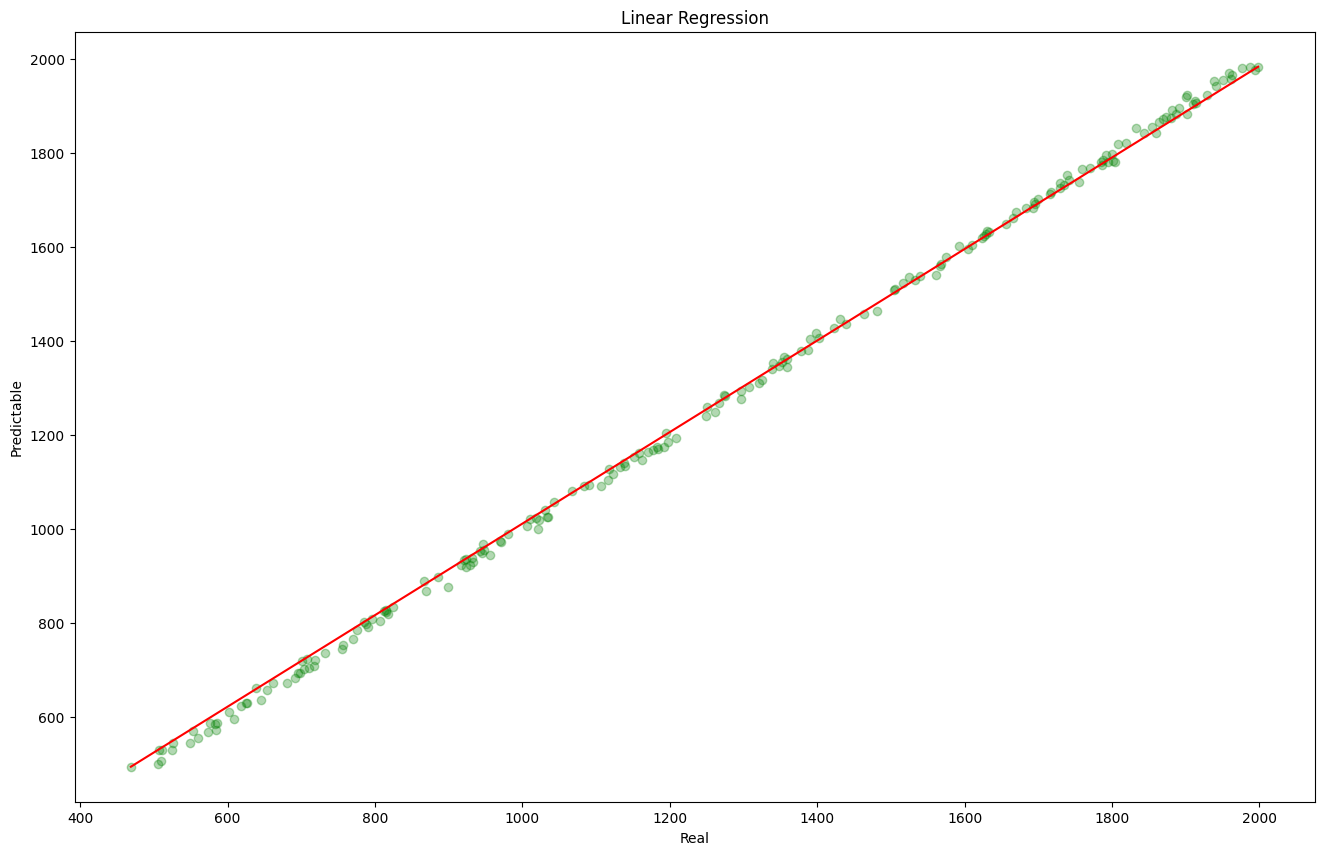

In [9]:
plt.figure(figsize=(16,10))
x = np.linspace(400,2000)
plt.title('Linear Regression')
plt.xlabel('Real')
plt.ylabel('Predictable')
plt.scatter(y_test, y_pred, c='green', alpha=0.3)
plt.plot([min(y_test), max(y_test)],[min(y_pred),max(y_pred)], c= 'red')
plt.show()